In [43]:
import numpy as np
import pandas as pd

In [44]:
path = r'C:\Users\ghoas\OneDrive\Desktop\excel sheets\naivebayes\titanic.csv'
data = pd.read_csv(path)
data.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [45]:
#remove unwanted
#set vaiables\
data=data.drop(['Name','Ticket','PassengerId','Fare','Cabin','Embarked','SibSp','Parch'],axis='columns')
X = data.drop(['Survived'],axis='columns')
y=data.Survived

In [46]:
X.head()

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0


In [47]:
#check is nan in table

X.columns[X.isna().any()]

Index(['Age'], dtype='object')

In [48]:
#check age
X.head(20)

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
5,3,male,NaN
6,1,male,54.0
7,3,male,2.0
8,3,female,27.0
9,2,female,14.0


In [49]:
#NaN in age replace by mean

X.Age= X.Age.fillna(X.Age.mean())
X.head(20)

,Pclass,Sex,Age
0,3,male,22.000000
1,1,female,38.000000
2,3,female,26.000000
3,1,female,35.000000
4,3,male,35.000000
5,3,male,29.699118
6,1,male,54.000000
7,3,male,2.000000
8,3,female,27.000000
9,2,female,14.000000


In [50]:
#get dummies for sex

dummies_sex = pd.get_dummies(X['Sex'])
dummies_sex

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [51]:
#conact with actual table

X= pd.concat([X,dummies_sex],axis='columns')

In [52]:
X=X.drop(['Sex'],axis='columns')

In [53]:
#split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
X_train.shape

(712, 4)

In [55]:
X_train

,Pclass,Age,female,male
331,1,45.500000,False,True
733,2,23.000000,False,True
382,3,32.000000,False,True
704,3,26.000000,False,True
813,3,6.000000,True,False
...,...,...,...,...
106,3,21.000000,True,False
270,1,29.699118,False,True
860,3,41.000000,False,True
435,1,14.000000,True,False


In [56]:
#create Naive bayes model using gaussian naive bayes

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

In [57]:
model.fit(X_train,y_train)

GaussianNB()

In [59]:
model.score(X_test,y_test)

0.7821229050279329

In [61]:
y_test[:10]

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: Survived, dtype: int64

In [62]:
model.predict(X_test[:10])

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
#probability

model.predict_proba(X_test[:10])
#says 97% survived while 2% didnt 

array([[0.97800273, 0.02199727],
       [0.95407941, 0.04592059],
       [0.97433317, 0.02566683],
       [0.00661158, 0.99338842],
       [0.0196437 , 0.9803563 ],
       [0.00353008, 0.99646992],
       [0.02727125, 0.97272875],
       [0.97138497, 0.02861503],
       [0.02095756, 0.97904244],
       [0.00306412, 0.99693588]])

In [64]:
#lets check the probabilty

from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test)

In [65]:
cn=confusion_matrix(y_predicted,y_test)

In [66]:
cn

array([[88, 22],
       [17, 52]])

<Axes: >

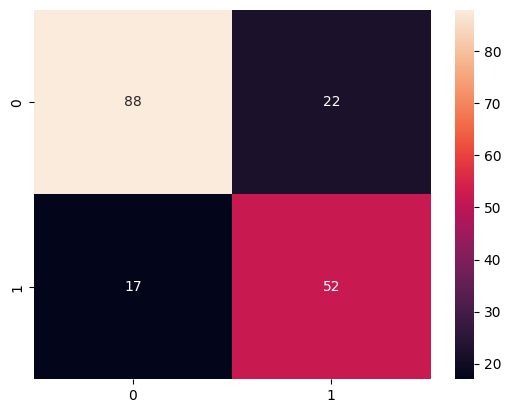

In [67]:
import seaborn as sn

sn.heatmap(cn,annot=True)

In [69]:
sum=88+22+17+52
sum

179

In [72]:
#97 percent 

sucessrate = (78*sum)/100

In [73]:
sucessrate

139.62